## Ankit Singh
## DSAI
## 201020407

### Task A

#### A. Observations

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import homogeneity_score, completeness_score, silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("../input/social-networking-service-dataset-for-kmeans/snsdata.csv")

##### 1. Observe the data (no. of observations/features/data types)

In [2]:
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

##### 2. Find out features which contain missing values

In [4]:
df.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

##### 3. Refer feature ‘age’ and identify values out of domain (teenagers age should not beyond (13-20) ). Replace all those outlier with missing values (NA).

In [5]:
# Identify values out of the domain
outliers = (df['age'] < 13) | (df['age'] > 20)

# Replace outliers with missing values
df.loc[outliers, 'age'] = np.nan

In [6]:
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.head(100)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2006,F,18.396,69,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,2006,F,18.261,20,12,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,2006,F,NaN,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,2006,M,18.730,52,0,0,0,0,4,0,...,0,0,0,0,1,1,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24477 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [9]:
df.isnull().sum()

gradyear           0
gender          2724
age             5523
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

#### B. Data Preparation

##### (i) Handling missing value- gender
Using dummy coding (it use binary coding for all levels except one (declare as reference))
Make three categories under Gender
Male, Female, No_gender

In [10]:
# Check the unique values in the 'gender' column
print(df['gender'].unique())

['M' 'F' nan]


In [11]:
# Replace missing values with NaN
df['gender'] = df['gender'].fillna(value=np.nan)

In [12]:
# Create dummy variables for the 'gender' column
gender_dummies = pd.get_dummies(df['gender'], prefix='gender', dummy_na=True)

# Create a new column 'female' with binary values based on the 'gender_F' column
df['female'] = gender_dummies['gender_F']

# Create a new column 'no_gender' with binary values based on the 'gender_nan' column
df['no_gender'] = gender_dummies['gender_nan']


In [13]:
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,female,no_gender
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df['male'] = gender_dummies['gender_M']

In [15]:
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,clothes,hollister,abercrombie,die,death,drunk,drugs,female,no_gender,male
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##### (ii) Handling missing value- age

We have to impute it.

Option A- Replace missing value by mean of remaining.

Option B- Replace missing value by mean of remaining as per underlying year of passing (gradeyear) group as:


gradyear  age_mean

2006      18.65586

2007      17.70617

2008      16.76770

2009      15.81957

Follow option –B

In [16]:
# Calculate mean age for each grade year
mean_age_by_gradyear = df.groupby('gradyear')['age'].mean()

# Replace missing age values by mean age for corresponding grade year
for gradyear, mean_age in mean_age_by_gradyear.items():
    df.loc[(df['gradyear'] == gradyear) & (df['age'].isna()), 'age'] = mean_age

# Convert age column to integer type
df['age'] = df['age']

In [17]:
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,clothes,hollister,abercrombie,die,death,drunk,drugs,female,no_gender,male
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
df.head(100)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,clothes,hollister,abercrombie,die,death,drunk,drugs,female,no_gender,male
0,2006,M,18.982000,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,F,18.801000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2006,M,18.335000,69,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2006,F,18.875000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2006,NaN,18.995000,10,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2006,F,18.396000,69,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
96,2006,F,18.261000,20,12,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
97,2006,F,18.655858,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
98,2006,M,18.730000,52,0,0,0,0,4,0,...,0,1,1,0,0,0,0,0,0,1


#### C-Training

##### 1. Create the dataset by dropping first 4 features
gradyear, gender, age, friends

OR

##### Create the dataset by dropping only categorical features (gender)



In [19]:
df.drop(['gender','gradyear','age','friends'], axis=1, inplace=True)

In [20]:
df

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,clothes,hollister,abercrombie,die,death,drunk,drugs,female,no_gender,male
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   basketball    30000 non-null  int64
 1   football      30000 non-null  int64
 2   soccer        30000 non-null  int64
 3   softball      30000 non-null  int64
 4   volleyball    30000 non-null  int64
 5   swimming      30000 non-null  int64
 6   cheerleading  30000 non-null  int64
 7   baseball      30000 non-null  int64
 8   tennis        30000 non-null  int64
 9   sports        30000 non-null  int64
 10  cute          30000 non-null  int64
 11  sex           30000 non-null  int64
 12  sexy          30000 non-null  int64
 13  hot           30000 non-null  int64
 14  kissed        30000 non-null  int64
 15  dance         30000 non-null  int64
 16  band          30000 non-null  int64
 17  marching      30000 non-null  int64
 18  music         30000 non-null  int64
 19  rock          30000 non-n

In [22]:
df.isnull().sum()

basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
female          0
no_gender       0
male            0
dtype: int64

##### 2. Standardize the whole dataset

In [23]:
# Standardize the whole dataset
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [24]:
# Convert the scaled array back to a DataFrame
#df_std = pd.DataFrame(df_std, columns=df.columns)

# Check the head of the standardized DataFrame
#df_std.head()

##### 3. Apply k-mean clustering, agglomerative and DBSCAN clustering algorithm

##### **DBSCAN**

Text(0, 0.5, 'Distance')

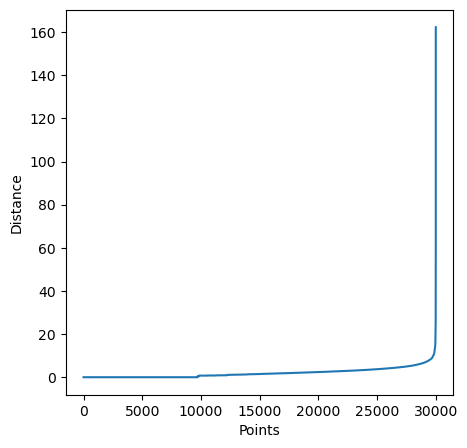

In [25]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=10)
neighbors = nearest_neighbors.fit(df_std)
distances, indices = neighbors.kneighbors(df_std)
distances = np.sort(distances[:,1], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [26]:
# DBSCAN clustering
dbscan = DBSCAN(eps=10, min_samples=10)
#labels_dbscan = dbscan.fit_predict(df_std)
dbscan.fit(df_std)

# Get cluster labels
labels = dbscan.labels_

# Add cluster labels to dataset
df['Cluster'] = labels

In [27]:
# Get number of observations in each cluster
cluster_counts = df.groupby('Cluster').size()


# Get silhouette score
silhouette = silhouette_score(df_std, labels)

# Print results
print(f"Cluster counts: \n{cluster_counts}\n")
print(f"Silhouette score: {silhouette:.3f}")

Cluster counts: 
Cluster
-1      239
 0    29761
dtype: int64

Silhouette score: 0.712


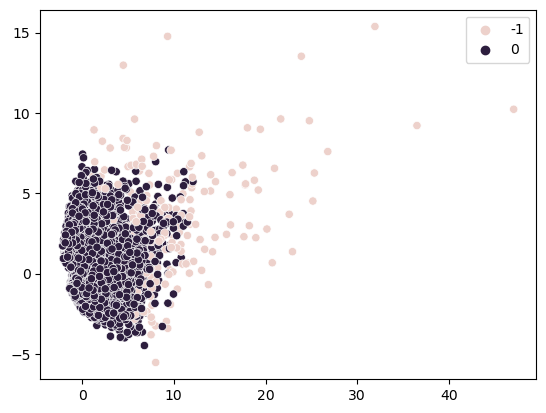

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA on the scaled data
pca = PCA(n_components=2)
pca.fit(df_std)
reduced_data = pca.transform(df_std)

# Plot the data points with different colors for each cluster
# Scatter plot with clusters color-coded
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=labels)
plt.show()


In [29]:
df.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,hollister,abercrombie,die,death,drunk,drugs,female,no_gender,male,Cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0


##### **K-Means**

In [30]:
df.drop('Cluster', axis=1, inplace=True)

In [31]:
df_std = pd.DataFrame(df_std, columns=df.columns)
non_numeric_cols = df_std.select_dtypes(exclude='number').columns
print(non_numeric_cols)

Index([], dtype='object')


In [32]:
#kmeans = KMeans(n_clusters=5, random_state=42)

In [33]:
#model = kmeans.fit(df_std)

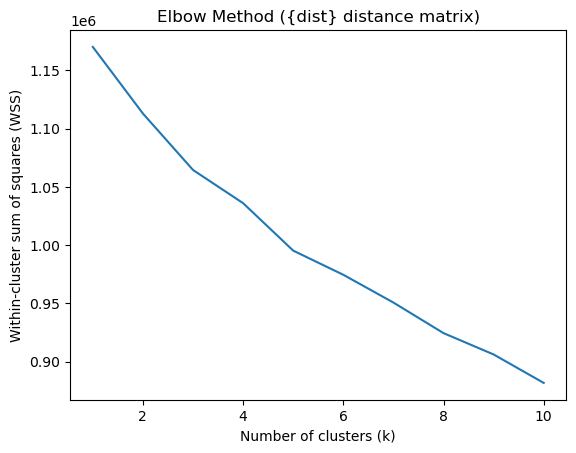

In [34]:

# Creating a function with KMeans to plot "The Elbow Curve"
wss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df_std)
    wss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wss) 
plt.title('Elbow Method ({dist} distance matrix)')
plt.xlabel('Number of clusters (k)')
plt.ylabel("Within-cluster sum of squares (WSS)")
plt.show()

In [35]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_std)

KMeans(n_clusters=5, random_state=42)

In [36]:
score = silhouette_score(df_std, kmeans.labels_)
print(f"Silhouette score for the clustering: {score}")


Silhouette score for the clustering: 0.15282697882313034


In [37]:
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

In [38]:
unique_labels, counts = np.unique(cluster_labels, return_counts=True)
cluster_sizes = dict(zip(unique_labels, counts))
print(f"Cluster sizes:\n{cluster_sizes}")

Cluster sizes:
{0: 19588, 1: 2651, 2: 1, 3: 5100, 4: 2660}


In [52]:
df['Cluster'] = cluster_labels

# Display the number of observations in each cluster

n_obs = len(df)
n_clusters = len(np.unique(cluster_labels))
print(f"Number of observations: {n_obs}")
print(f"Number of clusters: {n_clusters}")
for i in range(n_clusters):
    print(f"\nCluster {i+1}:")
    cluster_i = df[df['Cluster'] == i].iloc[:,1:].values
    n_obs_i = len(cluster_i)
    print(f"Number of observations in cluster: {n_obs_i}")
    homogeneity = np.sum(cluster_labels == i) / n_obs
    print(f"Homogeneity: {homogeneity}")
    dists = np.sqrt(np.sum((cluster_i - kmeans.cluster_centers_[i].reshape(-1, 1).T)**2, axis=0))
    heterogeneity = np.sum(dists) / n_obs_i
    print(f"Heterogeneity: {heterogeneity})")

Number of observations: 30000
Number of clusters: 5

Cluster 1:
Number of observations in cluster: 19588
Homogeneity: 0.6529333333333334
Heterogeneity: 0.15613973084685126)

Cluster 2:
Number of observations in cluster: 2651
Homogeneity: 0.08836666666666666
Heterogeneity: 0.5006809318934956)

Cluster 3:
Number of observations in cluster: 1
Homogeneity: 3.3333333333333335e-05
Heterogeneity: 626.3693209981943)

Cluster 4:
Number of observations in cluster: 5100
Homogeneity: 0.17
Heterogeneity: 0.3239575064350363)

Cluster 5:
Number of observations in cluster: 2660
Homogeneity: 0.08866666666666667
Heterogeneity: 1.0558979153192862)


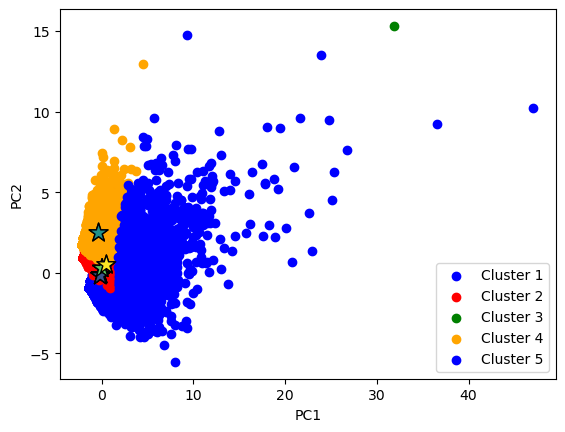

In [53]:
# Perform PCA on the scaled data
pca = PCA(n_components=2)
pca.fit(df_std)
reduced_data = pca.transform(df_std)

# Plot the data points with different colors for each cluster
colors = ['blue', 'red', 'green', 'orange', 'blue']
for i in range(len(colors)):
    x = reduced_data[cluster_labels == i, 0]
    y = reduced_data[cluster_labels == i, 1]
    plt.scatter(x, y, c=colors[i], label=f'Cluster {i+1}')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c=[0, 1, 2, 3, 4], edgecolors='k')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [54]:
df.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,hollister,abercrombie,die,death,drunk,drugs,female,no_gender,male,Cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,4


##### **Agglomerative Clustering**

In [55]:
df.drop('Cluster', axis=1, inplace=True)

In [57]:


# Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=5)
agglo.fit(df_std)

AgglomerativeClustering(n_clusters=5)

In [58]:
score = silhouette_score(df_std, agglo.labels_)
print(f"Silhouette score for the clustering: {score}")

Silhouette score for the clustering: 0.05938120686393698


In [60]:
#cluster_centers = agglo.cluster_centers_
cluster_labels = agglo.labels_

In [61]:
unique_labels, counts = np.unique(cluster_labels, return_counts=True)
cluster_sizes = dict(zip(unique_labels, counts))
print(f"Cluster sizes:\n{cluster_sizes}")

Cluster sizes:
{0: 22187, 1: 677, 2: 4839, 3: 1, 4: 2296}


In [70]:
df['Cluster'] = cluster_labels

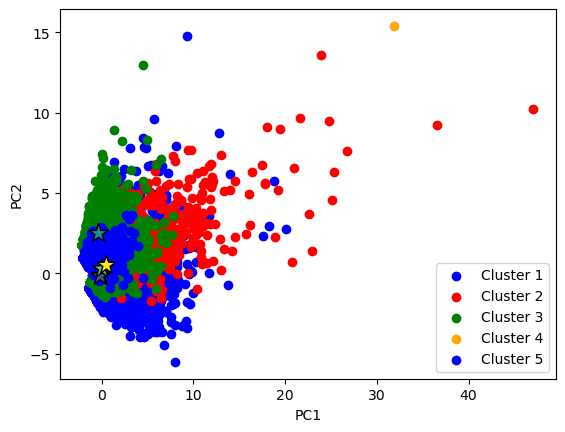

In [65]:
# Perform PCA on the scaled data
pca = PCA(n_components=2)
pca.fit(df_std)
reduced_data = pca.transform(df_std)

# Plot the data points with different colors for each cluster
colors = ['blue', 'red', 'green', 'orange', 'blue']
for i in range(len(colors)):
    x = reduced_data[cluster_labels == i, 0]
    y = reduced_data[cluster_labels == i, 1]
    plt.scatter(x, y, c=colors[i], label=f'Cluster {i+1}')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c=[0, 1, 2, 3, 4], edgecolors='k')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [71]:
df.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,hollister,abercrombie,die,death,drunk,drugs,female,no_gender,male,Cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1


In [72]:
df.drop('Cluster', axis=1, inplace=True)

In [73]:
df.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,clothes,hollister,abercrombie,die,death,drunk,drugs,female,no_gender,male
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
